In [21]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [23]:
# Generate summary statistics
#Large range of values so need to scale
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [24]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coin_id                       41 non-null     object 
 1   price_change_percentage_24h   41 non-null     float64
 2   price_change_percentage_7d    41 non-null     float64
 3   price_change_percentage_14d   41 non-null     float64
 4   price_change_percentage_30d   41 non-null     float64
 5   price_change_percentage_60d   41 non-null     float64
 6   price_change_percentage_200d  41 non-null     float64
 7   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


In [38]:
df_market_data.corr()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


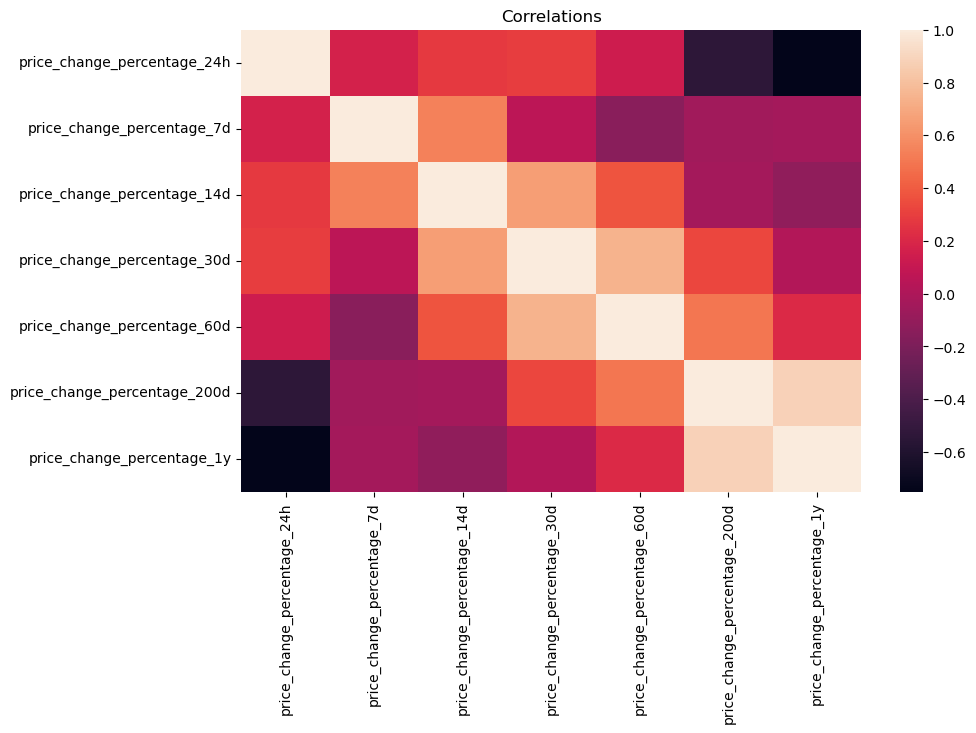

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.title("Correlations")
plt.show()

In [40]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [52]:
# get rid of the NULLs
# There were no nulls so no need to do this!
features = ['price_change_percentage_24h', 'price_change_percentage_7d', 
            'price_change_percentage_14d', 
            'price_change_percentage_30d', 'price_change_percentage_60d',
            'price_change_percentage_200d','price_change_percentage_1y']
#df_market_data = df_market_data.loc[:, features]
#df_market_data = df_market_data.dropna(how="any").reset_index(drop=True)
#df_market_data.info()


In [55]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
# initialize
df_market_data_sub = df_market_data.loc[:,features]
scaler = StandardScaler()

# fit
scaler.fit(df_market_data_sub)

# predict/transform
scaled_data = scaler.transform(df_market_data_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)
#df_scaled["coin_id"] = df_market_data.coin_id

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [56]:
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Data.

In [58]:
X = df_scaled.loc[:,features]
X.head

<bound method NDFrame.head of     price_change_percentage_24h  price_change_percentage_7d  \
0                      0.508529                    0.493193   
1                      0.185446                    0.934445   
2                      0.021774                   -0.706337   
3                     -0.040764                   -0.810928   
4                      1.193036                    2.000959   
5                      0.891871                    1.327295   
6                      0.011397                    2.572251   
7                      0.102530                    1.508001   
8                      0.077497                    0.334297   
9                      0.448952                   -0.190684   
10                     0.331280                   -1.614844   
11                     0.034352                   -0.733026   
12                     0.155710                   -0.922491   
13                     0.262723                    1.792602   
14                     0.

In [61]:
# Create a list with the number of k-values from 1 to 11
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

In [62]:
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_scaled)
    inertia.append(k_model.inertia_)

In [63]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3 or 4 look like the best k values but analysis will determine which one is best. Please see below. I would go with k = 4 since that elbow looks more defined than at 3. A k value of 4 at least splits up the clusters a little more into more clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [64]:
# Initialize the K-Means model using the best value for k
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
# Fit the K-Means model using the scaled data
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(df_market_data)

# Make predictions
k_lower = model.predict(df_market_data)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = df_market_data.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [65]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
spread_df_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower",
    hover_cols=["coin_id"]
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [72]:
df_market_data.hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols="coin_id"
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [73]:
# Initialize the K-Means model using the best value for k
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
# Fit the K-Means model using the scaled data
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(df_market_data)

# Make predictions
k_lower = model.predict(df_market_data)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = df_market_data.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [74]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
spread_df_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower",
    hover_cols=['coin_id']
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

In [96]:
# Initialize the K-Means model using the best value for k
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
# Fit the K-Means model using the scaled data
model = KMeans(n_clusters=2, random_state=1)

# Fit the model
model.fit(df_market_data)

# Make predictions
k_lower = model.predict(df_market_data)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = df_market_data.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [97]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
spread_df_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower",
    hover_cols=['coin_id']
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

### Optimize Clusters with Principal Component Analysis.

In [76]:
# Create a PCA model instance and set `n_components=3`.
# Instantiate the PCA instance and declare the number of PCA variables
num_pca = len(features)
pca = PCA(n_components=num_pca)

# Fit the PCA model on the transformed credit card DataFrame
data_pca = pca.fit_transform(df_scaled.loc[:,features])

# Create the PCA DataFrame
df_pca = pd.DataFrame(
    data_pca,
    columns=[f"PCA{x+1}" for x in range(num_pca)]
)

df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


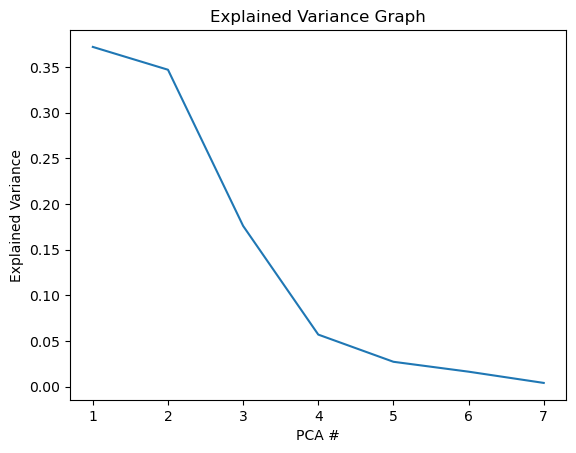

In [77]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# View the first five rows of the DataFrame. 
exp_var = pca.explained_variance_ratio_

plt.plot(range(1, num_pca + 1), exp_var)
plt.title("Explained Variance Graph")
plt.xlabel("PCA #")
plt.ylabel("Explained Variance")
plt.xticks(range(1, num_pca + 1))
plt.show()

In [78]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
print("Explained Variance")
for i in range(len(exp_var)):
    val = exp_var[i]
    print(f"PCA{i+1}:", round(val, 3))

print()
print("CUMULATIVE Explained Variance")

exp_var_cum = np.cumsum(exp_var)
for i in range(len(exp_var_cum)):
    val = exp_var_cum[i]
    print(f"PCA{i+1}:", round(val, 3))

Explained Variance
PCA1: 0.372
PCA2: 0.347
PCA3: 0.176
PCA4: 0.057
PCA5: 0.027
PCA6: 0.016
PCA7: 0.004

CUMULATIVE Explained Variance
PCA1: 0.372
PCA2: 0.719
PCA3: 0.895
PCA4: 0.952
PCA5: 0.979
PCA6: 0.996
PCA7: 1.0


## Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total Explained variance of PCA 1-3 is 0.372+0.347+0.176 = 0.895 or about 90%

In [79]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df2 = df_pca.loc[:, ["PCA1", "PCA2", "PCA3"]]
df2.head()

# Copy the crypto names from the original data
df2["coin_id"] = df_pca.index

# Set the coinid column as index
df2 = df2.set_index("coin_id")

# Display sample data
df2.head()

,PCA1,PCA2,PCA3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [80]:
# Create a list with the number of k-values from 1 to 11

In [81]:
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_pca)
    inertia.append(k_model.inertia_)


In [82]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [83]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** When using the PCA data, it looks like 4 is the best value for k since the elbow is well defined.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not differ because the k value with the original data was showing 4 as the best value and so does PCA.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [84]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=1)

In [85]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=2, random_state=1)

In [86]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_lower = model.predict(df_pca)

# Print the resulting array of cluster values.

In [94]:
# Create a copy of the DataFrame with the PCA data
spread_df_predictions = df_pca.loc[:, ["PCA1", "PCA2"]]

# Add a new column to the DataFrame with the predicted clusters
spread_df_predictions['clusters_lower'] = k_lower

# Display sample data
spread_df_predictions.head()

,PCA1,PCA2,clusters_lower
0,-0.600667,0.842760,0
1,-0.458261,0.458466,0
2,-0.433070,-0.168126,0
3,-0.471835,-0.222660,0
4,-1.157800,2.041209,0


In [95]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Plot the clusters
spread_df_predictions.hvplot.scatter(
    width=800,
    height=400,
    x="PCA1",
    y="PCA2",
    hover_cols="coin_id"
)

:Scatter   [PCA1]   (PCA2)

In [104]:
# Create a copy of the DataFrame with the PCA data
spread_df_predictions = df_pca.loc[:, ["PCA1", "PCA2", "PCA3"]]

# Add a new column to the DataFrame with the predicted clusters
spread_df_predictions['clusters_lower'] = k_lower

# Display sample data
spread_df_predictions.head()

,PCA1,PCA2,PCA3,clusters_lower
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,0
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,0


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

#The elbow plot for PCA seems smoother

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer clusters leads to less distinctions between the data and they all get grouped into one ot two big groups. That does not offer much conclusions when all the data is grouped together.